In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
#plot
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, y_1, y_2, ax, ticks,title, colors=['b']):
    ax.plot(x, y_1, 'b', label="Train Loss")
    ax.plot(x, y_2, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

In [3]:
#Parameters
hidden_layer_1 = 512 # 1st layer number of neurons
hidden_layer_2 = 256 # 2nd layer number of neurons
hidden_layer_3 = 128 # 3rd layer number of neurons
hidden_layer_4 = 56 # 4th layer number of neurons
input_class = 784 # MNIST data input (img shape: 28*28)
output_class = 10 # MNIST total classes (0-9 digits)

In [4]:
x = tf.placeholder(tf.float32, [None, 784]) #input placeholder
y_ = tf.placeholder(tf.float32, [None, 10]) #output placeholder

keep_prob = tf.placeholder(tf.float32) #dropout

In [8]:
#weights
weights = {
    'h1': tf.Variable(tf.random_normal([input_class, hidden_layer_1],stddev=0.062, mean=0)),        #784x512
    'h2': tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2],stddev=0.088, mean=0)), #512x256
    'h3': tf.Variable(tf.random_normal([hidden_layer_2, hidden_layer_3],stddev=0.125, mean=0)), #256x128
    'h4': tf.Variable(tf.random_normal([hidden_layer_3, hidden_layer_4],stddev=0.187, mean=0)), #128x56
    'out': tf.Variable(tf.random_normal([hidden_layer_4, output_class],stddev=0.172, mean=0))      #56x10
}

#bias
biases = {
    'b1': tf.Variable(tf.random_normal([hidden_layer_1])),             #512x1
    'b2': tf.Variable(tf.random_normal([hidden_layer_2])),             #256x1
    'b3': tf.Variable(tf.random_normal([hidden_layer_3])),             #128x1
    'b4': tf.Variable(tf.random_normal([hidden_layer_4])),             #56x1
    'out': tf.Variable(tf.random_normal([output_class]))                  #10x1
}

In [11]:
epsilon = 1e-3
training_epochs = 10
learning_rate = 0.001
batch_size = 100
display_step = 1

# Create model
def multilayer_perceptron_dropout(x, weights, biases):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) # Hidden layer with ReLu activation
    batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0]) # Calculate the mean and variance of x.
    scale_1 = tf.Variable(tf.ones([hidden_layer_1]))
    beta_1 = tf.Variable(tf.zeros([hidden_layer_1]))
    
    layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon) #BatchNormalization
    layer_1 = tf.nn.relu(layer_1) #ReLu activation
    layer_1_drop = tf.nn.dropout(layer_1, keep_prob) #dropout
    
    layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2']) # Hidden layer with ReLu activation
    batch_mean_2, batch_var_2 = tf.nn.moments(layer_2,[0]) # Calculate the mean and variance of x.
    scale_2 = tf.Variable(tf.ones([hidden_layer_2]))
    beta_2 = tf.Variable(tf.zeros([hidden_layer_2]))
    
    layer_2 = tf.nn.batch_normalization(layer_2, batch_mean_2, batch_var_2, beta_2, scale_2, epsilon)
    layer_2 = tf.nn.relu(layer_2)
    layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
    
    layer_3 = tf.add(tf.matmul(layer_2_drop, weights['h3']), biases['b3']) 
    batch_mean_3, batch_var_3 = tf.nn.moments(layer_3,[0])
    scale_3 = tf.Variable(tf.ones([hidden_layer_3]))
    beta_3 = tf.Variable(tf.zeros([hidden_layer_3]))
    
    layer_3 = tf.nn.batch_normalization(layer_3, batch_mean_3, batch_var_3, beta_3, scale_3, epsilon)
    layer_3 = tf.nn.relu(layer_3)
    layer_3_drop = tf.nn.dropout(layer_3, keep_prob)
    
    layer_4 = tf.add(tf.matmul(layer_3_drop, weights['h4']), biases['b4']) 
    batch_mean_4, batch_var_4 = tf.nn.moments(layer_4,[0])
    scale_4 = tf.Variable(tf.ones([hidden_layer_4]))
    beta_4 = tf.Variable(tf.zeros([hidden_layer_4]))
    
    layer_4 = tf.nn.batch_normalization(layer_4, batch_mean_4, batch_var_4, beta_4, scale_4, epsilon)
    layer_4 = tf.nn.relu(layer_4)
    layer_4_drop = tf.nn.dropout(layer_4, keep_prob)
    
    # Output layer with Sigmoid activation
    out_layer = tf.matmul(layer_4_drop, weights['out']) + biases['out'] 
    out_layer = tf.nn.sigmoid(out_layer)
    
    return out_layer

Epoch: 0001 train cost=1.852387015 test cost=1.721993961
Epoch: 0002 train cost=1.624475372 test cost=1.556165109
Epoch: 0003 train cost=1.580085707 test cost=1.523266523
Epoch: 0004 train cost=1.550704152 test cost=1.496722353
Epoch: 0005 train cost=1.535442507 test cost=1.491262910
Epoch: 0006 train cost=1.524927568 test cost=1.487699632
Epoch: 0007 train cost=1.519252183 test cost=1.485829424
Epoch: 0008 train cost=1.514755696 test cost=1.484009803
Epoch: 0009 train cost=1.509799231 test cost=1.482679310
Epoch: 0010 train cost=1.507130619 test cost=1.482093251
Accuracy: 0.9748


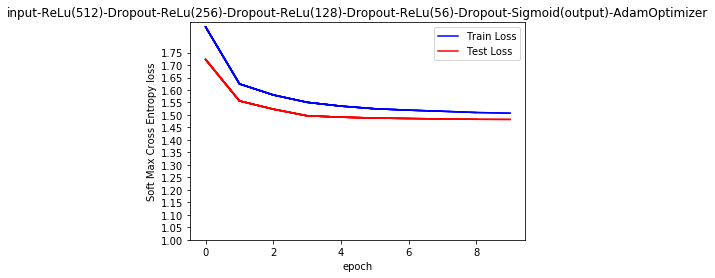

In [12]:
y = multilayer_perceptron_dropout(x, weights_relu, biases)
cost_drop = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y_))
adam_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_drop)

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Soft Max Cross Entropy loss')
    xs, ytrs, ytes = [], [], []
    for epoch in range(training_epochs):
        train_avg_cost = 0.
        test_avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # using AdamOptimizer
            _, c, w = sess.run([adam_optimizer, cost_drop, weights], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
            train_avg_cost += c / total_batch
            c = sess.run(cost_drop, feed_dict={x: mnist.test.images, y_: mnist.test.labels,  keep_prob: 1.0})
            test_avg_cost += c / total_batch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-ReLu(512)-Dropout-ReLu(256)-Dropout-ReLu(128)-Dropout-ReLu(56)-Dropout-Sigmoid(output)-AdamOptimizer")

        if epoch%display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))

    # plot final results
    plt_dynamic(xs, ytrs, ytes, ax,np.arange(1, 1.8, step=0.05), "input-ReLu(512)-Dropout-ReLu(256)-Dropout-ReLu(128)-Dropout-ReLu(56)-Dropout-Sigmoid(output)-AdamOptimizer")

    # we are calculating the final accuracy on the test data
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0 }))